<a href="https://colab.research.google.com/github/BeforeTheStorm202/NT230.N22.ATCL-Group5/blob/main/ModelClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Define classifier model 

In [ ]:
import os
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#add label to csv file 0 = normal ; 1 = malicious
import csv

# Open the input CSV file for reading
with open('/content/drive/MyDrive/Malware/malware_test_feature_vectors.csv', 'r') as infile:
    # Create a CSV reader object
    reader = csv.reader(infile)
    
    # Read all existing rows & append the constant value 0
    updated_rows = []
    for row in reader:
        row.append('1')
        updated_rows.append(row)

# Open the output CSV file for writing
with open('/content/drive/MyDrive/Malware/malware_test_feature_vectors.csv', 'w', newline='') as outfile:
    # Create a CSV writer object
    writer = csv.writer(outfile)
    
    # Write the updated rows (with added 0 column) to the output file
    for row in updated_rows:
        writer.writerow(row)

In [ ]:
# load dataset
X = pd.read_csv('/content/drive/MyDrive/Malware/datatrain_official.csv',header=None)
print(X.shape)
y = X.iloc[:, -1] #label
X = X.iloc[:, :-1]#remove the label column
print(y)

(12000, 401)
0        0
1        0
2        0
3        0
4        0
        ..
11995    1
11996    1
11997    1
11998    1
11999    1
Name: 400, Length: 12000, dtype: int64


In [ ]:
X.head()


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.724374,0.723130,1.742111,-0.341297,-0.162678,-2.806555,2.047710,3.283168,-0.697285,-1.038879,...,1.005829,-1.850715,0.285391,-1.608882,2.086394,-1.093293,0.455736,-2.401511,-1.931166,0.443629
1,-1.350686,1.933452,0.693955,-1.170800,-0.252616,-2.377649,0.337246,1.503177,-1.287510,-1.743109,...,1.432678,0.293394,1.532014,-0.777892,0.277946,0.080310,-0.283706,-0.364489,-2.341404,0.165316
2,-0.091339,1.384228,0.553626,-1.283343,0.185788,-1.350078,2.509072,1.960202,-0.820504,-0.632669,...,-0.624888,0.747580,0.637372,-0.381482,1.234511,-0.334936,-2.347271,0.329604,-1.540294,0.685003
3,0.335801,1.218206,2.223142,-0.454021,-1.171166,-0.148812,-0.868848,2.005006,-0.824708,0.140942,...,1.336496,-0.833137,-0.850778,-1.550518,0.528352,0.856441,-0.202574,-0.303891,0.525991,0.174881
4,-0.074732,0.640572,1.345869,-0.579004,-0.786756,0.183880,0.799201,1.103407,-1.288393,-0.896608,...,-0.892411,-0.805804,0.065370,0.889342,0.695457,0.733308,-1.310849,0.564230,-1.084652,0.818661


In [ ]:
y.columns = ["labels"]

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 400, dtype: int64

In [ ]:
#define model
RandomFR = RandomForestClassifier(n_estimators=393, n_jobs= 14, max_depth=11)
SVM = SVC( kernel='rbf',C=100,gamma=0.01)

##Train model

In [ ]:
ModelRF = RandomFR.fit(X,y)

In [ ]:
ModelSVM = SVM.fit(X,y)

In [ ]:
with open("/content/drive/MyDrive/Malware/models/RF.pickle", "wb") as handle:
    pickle.dump(RandomFR, handle)
with open("/content/drive/MyDrive/Malware/models/SVM.pickle", "wb") as handle:
    pickle.dump(SVM, handle)

##Test

In [ ]:
# load dataset
X = pd.read_csv('/content/drive/MyDrive/Malware/data_test_official.csv')
print(X.shape)
y_test = X.iloc[:, -1] #label
y_test.columns = ["labels"]
X_test = X.iloc[:, :-1]#remove the label column
print(y)

(7999, 401)
0        0
1        0
2        0
3        0
4        0
        ..
11995    1
11996    1
11997    1
11998    1
11999    1
Name: 400, Length: 12000, dtype: int64


In [ ]:
#predict
y_predRF = ModelRF.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predRF)
print("Accuracy:", accuracy)

Accuracy: 0.998999874984373


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
def evaluation(y_test, y_pred):
  print('Misclassified samples: %d' % (y_test != y_pred).sum())
  result = confusion_matrix(y_test, y_pred, normalize='true')
  #print("Confusion Matrix:")
  #print(result)
  sns.heatmap(result, annot=True)
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)
  result2 = 100* accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred, average='weighted')
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred, average='weighted')
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred, average='weighted')
  print("F1:",result5)


##RANDOM FOREST EVALUATION

Misclassified samples: 8
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3999
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      7999
   macro avg       1.00      1.00      1.00      7999
weighted avg       1.00      1.00      1.00      7999

Accuracy: 99.8999874984373
Precision: 0.998999874984373
Recall: 0.998999874984373
F1: 0.998999874984373


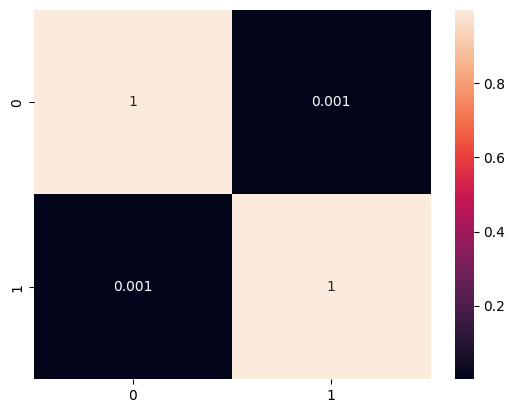

In [ ]:
evaluation(y_test,y_predRF)

##SVM EVALATION

In [ ]:
y_predsvm = ModelSVM.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Misclassified samples: 615
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3999
           1       1.00      0.85      0.92      4000

    accuracy                           0.92      7999
   macro avg       0.93      0.92      0.92      7999
weighted avg       0.93      0.92      0.92      7999

Accuracy: 92.3115389423678
Precision: 0.933363338167596
Recall: 0.923115389423678
F1: 0.9226589554538702


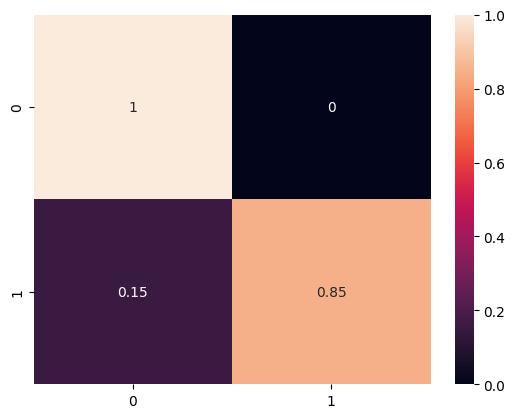

In [ ]:
evaluation(y_test,y_predsvm)